<a href="https://colab.research.google.com/github/HainanXu/MathFinance/blob/main/AOM466_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [163]:
#bell_canada_stock = yf.download("RY.TO", start="2023-03-10", end="2024-03-10")
loblaw_canada_stock=yf.download("L.TO", start="2023-04-13", end="2024-04-12")
#yf.download("AC.TO", start="2022-01-04", end="2024-04-15")

daily_returns = loblaw_canada_stock['Adj Close'].pct_change().dropna()

# Calculate annualized volatility (assuming 252 trading days per year)
volatility = np.sqrt(252) * daily_returns.std()

print(volatility)

daily_returns.shape

[*********************100%%**********************]  1 of 1 completed

0.172646494335603


(250,)

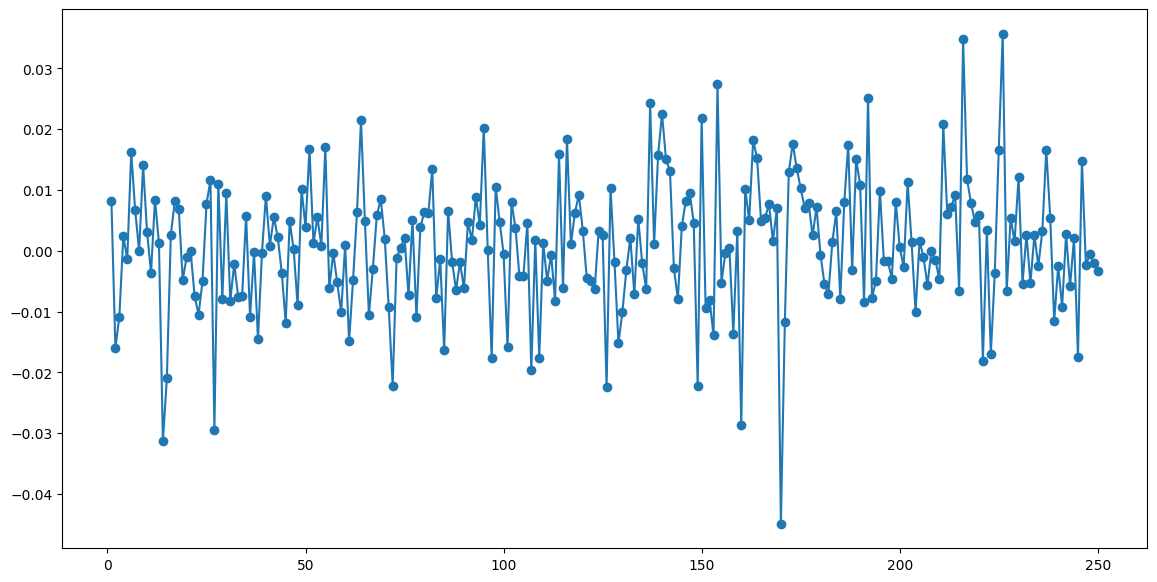

In [167]:
df = pd.DataFrame({
    'Date': range(1, 251),
    'Daily Returns': daily_returns
})

df.set_index('Date', inplace=True)  # Set the date as the index

# Plotting the line chart
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Daily Returns'], marker='o')

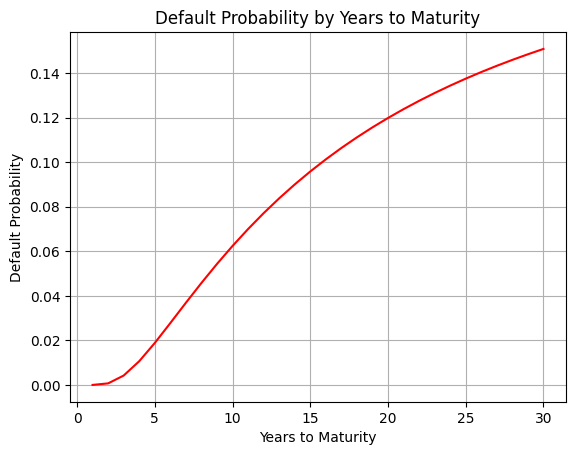

In [152]:
import numpy as np
from scipy.stats import norm

#outstanding shares

def merton_default_probability(stock_price, debt, equity, volatility, risk_free_rate, time_to_maturity):
      #d1 = np.log(((stock_price*equity+debt)) / (debt*np.exp(risk_free_rate*time_to_maturity)))/(volatility*np.sqrt(time_to_maturity)) + (volatility * np.sqrt(risk_free_rate))/2
      #d1 = np.log(((debt*np.exp(risk_free_rate*time_to_maturity)/(10260000000)) ))/(volatility*np.sqrt(time_to_maturity)) + (volatility * np.sqrt(risk_free_rate))/2
      #d1 = (np.log(((38979000000)) / debt) + (risk_free_rate + (volatility ** 2)*0.5) * time_to_maturity) / (volatility * np.sqrt(time_to_maturity))
      #d1 = np.log(((stock_price*equity+debt)) / (debt*np.exp(risk_free_rate*time_to_maturity)))/(volatility*np.sqrt(time_to_maturity)) + (volatility * np.sqrt(risk_free_rate))/2
      #d1= (np.log(((38979000000)) / debt) + (risk_free_rate + (volatility ** 2)/2) * time_to_maturity) / (volatility * np.sqrt(time_to_maturity))
      #d2 = d1 - volatility * np.sqrt(time_to_maturity)
      #d2= (np.log(((38979000000)) / debt) + (risk_free_rate - (volatility ** 2)/2) * time_to_maturity) / (volatility * np.sqrt(time_to_maturity))


      d1 = np.log(((38979000000*(np.exp(risk_free_rate*time_to_maturity)/(18173000000)))))/(volatility*np.sqrt(time_to_maturity)) + (volatility * np.sqrt(risk_free_rate))/2
      d2 = d1-volatility * np.sqrt(time_to_maturity)
      default_prob = norm.cdf(-d2)
      return default_prob

# Example parameters
#debt =18173000000 #29000000000#18173000000 #rbc439282000000 #1403282000 # Total debt
#Asset=38979000000
#equity = 309260000#800000000#309260000 #rbc1410000000#120890000 # Total equity #Shares Outstanding
volatility = volatility
risk_free_rate = 0.0364  # Risk-free rate -acquired from
years_to_maturity = np.arange(1, 31)  # Years to maturity from 1 to 30

# Calculate default probability for each maturity year
default_probabilities = []
for maturity_year in years_to_maturity:
    time_to_maturity = maturity_year
    default_prob = merton_default_probability(loblaw_canada_stock['Adj Close'].mean(), debt, equity, volatility, risk_free_rate, time_to_maturity)
    default_probabilities.append(default_prob)

# Plot default probability vs. years to maturity
plt.plot(years_to_maturity, default_probabilities,color='red')
plt.title('Default Probability by Years to Maturity')
plt.xlabel('Years to Maturity')
plt.ylabel('Default Probability')
plt.grid(True)
plt.show()

# CreditMetrics:


In [ ]:

transition_matrix = TM_raw.to_numpy()[:, 1:]/100

credit_ratings = ['AAA', 'AA+','AA','AA-' ,'A+','A','A-' ,'BBB+','BBB','BBB-', 'BB+','BB','BB-','B+','B','B-', 'CCC']

num_simulations = 1000
num_steps = 30
monte_carlo_results = np.zeros(num_steps)


In [ ]:
def monte_carlo_prob_last_state(transition_matrix, initial_state, T, num_simulations):
    num_states = len(initial_state)
    num_last_state_reached = 0

    for _ in range(num_simulations):
        current_state = initial_state
        for _ in range(T):
            pnow = current_state.dot(transition_matrix)
            pnow = pnow/np.sum(pnow)
            rand_num = np.random.uniform()
            cumulative_probs = np.cumsum(pnow)
            current_state = np.argmax(cumulative_probs > rand_num)
            if current_state == num_states:  # Check if last state is reached
              num_last_state_reached += 1
              break
            one_hot_current_state = np.zeros(num_states)
            one_hot_current_state[current_state] = 1
            current_state = one_hot_current_state



    probability_last_state = num_last_state_reached / num_simulations
    return probability_last_state

transition_matrix = TM
initial_state = np.zeros(transition_matrix.shape[0])  # Starting in the first state
initial_state[initial_rating] = 8
num_simulations = 5000


default_probabilities_rating = [monte_carlo_prob_last_state(transition_matrix, initial_state, horizon, num_simulations) for horizon in years_to_maturity]


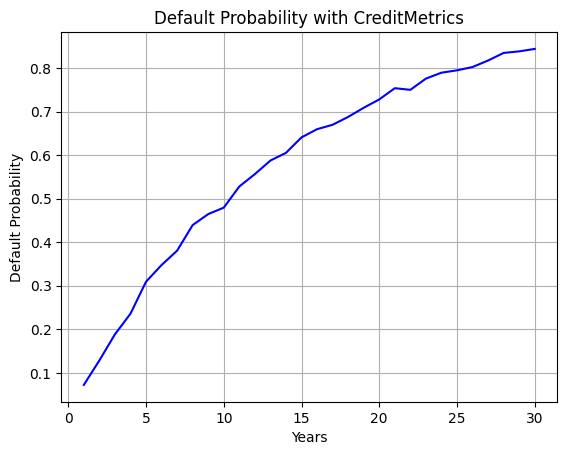

In [151]:
plt.plot(years_to_maturity, default_probabilities_rating,label="CreditMetrics Default Probability",color='blue')
plt.title('Default Probability with CreditMetrics')
plt.xlabel('Years')
plt.ylabel('Default Probability')
plt.grid(True)
plt.show()

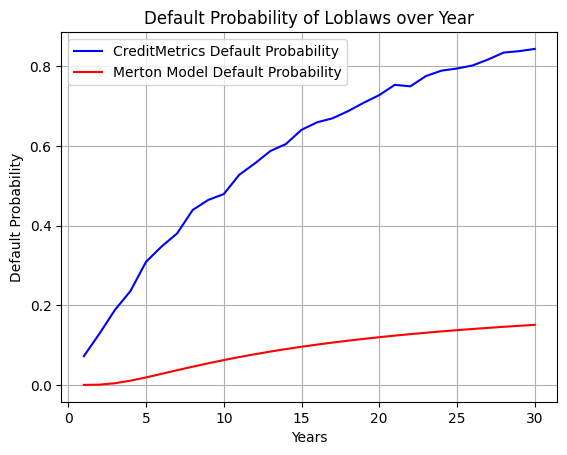

In [169]:

plt.plot(years_to_maturity, default_probabilities_rating,label="CreditMetrics Default Probability",color='blue')
plt.plot(years_to_maturity, default_probabilities, label='Merton Model Default Probability', color='red')
plt.title('Default Probability of Loblaws over Year')
plt.xlabel('Years')
plt.ylabel('Default Probability')
plt.grid(True)
plt.legend()
plt.show()